In this assignment the goal is to implement the dimensionality reduction technique *Principal Component Analysis (PCA)* to a very high dimensional data and apply visualization. Note that you are not allowed to use the built-in PCA API provided by the sklearn library. Instead you will be implementing from the scratch.

    For this task we use the MNIST dataset. First we download the dataset using openml api

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


# Part-1: Preprocessing
Before implementing PCA you are required to perform some preprocessing steps:
1. Mean normalization: Replace each feature/attribute, $x_{ji}$ with $x_j - \mu_j$, In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0 
2. Feature scaling: If features have very different scales then scale make them comparable by altering the scale, so they all have a comparable range of values e.g. $x_{ji}$ is set to $(x_j - \mu_j) / s_j$  Where $s_j$ is some measure of the range, so could be  $\max(x_j) - \min(x_j)$ or Standard deviation $stddev(x_j)$.

In [10]:
#TODO Implement mean normalization and feature scaling

import numpy as np

import matplotlib.pyplot as plt

xmax, xmin = X.max(), X.min()
X_scaled = (X - xmin)/(xmax - xmin)
    




#from sklearn import preprocessing
#Mean normalization of X
#X_norm = preprocessing.normalize(X)

#plt.imshow(X_norm);
#plt.colorbar()
#plt.show()

from sklearn.preprocessing import StandardScaler
#Feature Scaling of X
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
#X_scaled=scaler.fit_transform(X)
#print(X_scaled.shape)

# Part-2: Covariance matrix
Now the preprocessing is finished. Next, as explained in the lecture, you need to compute the covariance matrix https://en.wikipedia.org/wiki/Covariance_matrix. Given $n \times m$ $n$ rows and $m$ columns matrix, a covariance matrix is an $n \times n$ matrix given as below (sigma)
$\Sigma = \frac{1}{m}\sum{\left(x^{i}\right)\times \left(x^{i}\right)^{T}}$
You may use the "numpy.cov" function in numpy library 

In [11]:
#TODO Compute X to covariance matrix cov_matrix.
cov_matrix = np.cov(np.transpose(X_scaled))
print(cov_matrix.shape)


(784, 784)


# Part-3: SVD computation
Now compute the SVD on the covariance matrix $SVD(\Sigma)$. You may use the svd implementation in numpy.linalg.svd

In [12]:
import numpy as np
#def getSVD(mat, K):
def getSVD(mat):
    U, S, V = np.linalg.svd(mat,  full_matrices=False)
    return (U)
    #eigvals, eigvecs = np.linalg.eig(mat)
    #eigvals[:K]=eigvals[:K]/sum(eigvals) #chose K=10 because 10 first eigvals are highest
    #print(eigvals)
    #return (eigvals, eigvecs)
#S,U = getSVD(cov_matrix, 784) #SVD
#print(U.shape)
U = getSVD(cov_matrix)

# Part-4: Compute PCA matrix (K dimensional)
Now select the first $k$ columns from the matrix $U$ and multiply with $X$ to get $k$ dimensional representation.

In [13]:
def getKComponents(U, X, K):
    projected_X = np.zeros((K,70000))
    for i in range(0,K):
        projected_X[i] = X_scaled.dot(U.T[i])
        print(projected_X[i])
    return (projected_X)
#I set variable K to 10 for testing:
PCAmat = getKComponents(U,X_scaled,85)



[3.47049915 6.95378836 2.75971012 ... 1.92633339 1.77449884 7.14346727]
[ 1.30853109  1.20551061 -1.47551318 ... -2.24563496  0.5261519
  0.39542793]
[0.51066333 2.97047735 0.07589332 ... 2.04988176 3.20419991 3.57918888]
[ 4.11274442  3.83111852 -0.1465452  ...  3.6346918   3.0367089
 -1.17334577]
[3.43587904 0.32894478 2.40078412 ... 6.27062675 3.01998249 4.32568738]
[ 0.55383612  0.27304332 -0.33259332 ... -0.84521707  0.78461449
  2.48461576]
[ 2.88781557  1.78175003 -1.4051392  ...  1.8178731   2.57847376
  3.86712174]
[ 0.45553984 -0.68585278  1.18285497 ... -1.63684868  0.28303972
 -1.93755096]
[-0.21861888 -1.76209    -1.31782548 ... -1.42101597 -2.74339254
 -2.17964396]
[-1.13140799 -0.92638852  0.42256323 ...  2.81791198  0.47097878
 -0.59670618]
[ 1.25949557 -0.67284102  2.22089588 ... -0.25024343  0.3552896
  0.22281377]
[-0.27376509  0.25241177  0.10962284 ...  1.4689116   2.82556714
 -0.09681056]
[ 0.19064842  1.26008895 -0.77536233 ... -0.05381338 -1.65546395
  1.1623222

# Part-5: Compute Reconstruction Error
Implement a function to compute the variance ratio (from reconstruction error)

In [14]:
def getVarianceRatio(PCA, K, X):
    #Implement computation of reconstruction error
    # Average of the values in each row of U
    recErr = ((np.transpose(X[:,:K]) - PCA)**2).mean()/100
    return (recErr)

recErr = getVarianceRatio(PCAmat,85,X_scaled)
print(recErr)
print("K = 85 gives variance ratio <= 1%")

0.009729714372331133
K = 85 gives variance ratio <= 1%


Compare the variance ration to the built-in PCA implementation in sklearn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (this step is optional)

# Part-6: Scatter plot 2-dimensional PCA
Using matplotlib plot the 2-dimensional scatter plot of the first 2 compoenents with y (target) as labels

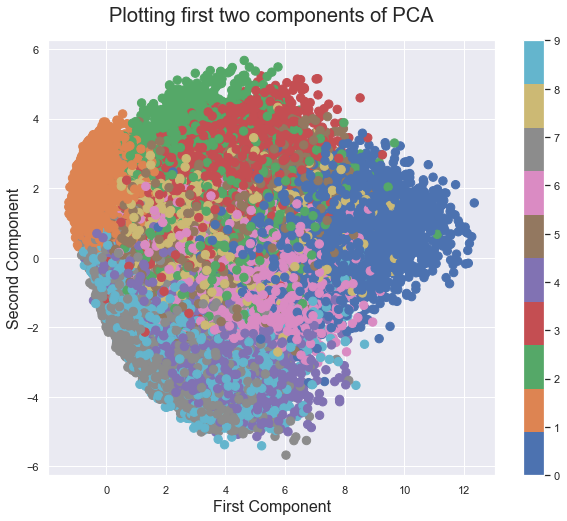

In [15]:
#PLOT FIRST TWO PCA COMPONENTS WITH y AS LABEL.
# import statements
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set()
sns.set(rc={"figure.figsize": (10, 8)})

PALETTE = sns.color_palette('deep', n_colors=10)
CMAP = ListedColormap(PALETTE.as_hex())

RANDOM_STATE = 42

features = ['first', 'second','third', 'fourth','fifth', 'sixth', 'seventh', 'eight', 'ninth', 'tenth']
target = 'y'



temp = PCAmat[:10,:]
PCA2Comp = np.transpose(temp)

data = pd.DataFrame(PCA2Comp,
    columns=features)


y = [float(x) for x in y]
data[target] = y



def plot_PCA_2Comp_2d(x, y, title, xlabel="1st component", ylabel="2nd component"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=data['y'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.colorbar()
    
plot_PCA_2Comp_2d(
    x = data['first'],
    y = data['second'],
    title = 'Plotting first two components of PCA',
    xlabel = 'First Component',
    ylabel = 'Second Component')

# Part-7 Find best $K$
Find the minimum value of $K$ with which the ratio between averaged squared projection error with total variation in data is less than 10% in other words we retain 90% of the variance. You can achieve this by repeating getKComponents with $K=1$ until the variance ratio is <= 10%.

# Part-8: TSNE visualization
Finally, having found an optimal $K$ use these components as an input data to another dimensionality reduction method called tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and reduce it to 2 dimensions.

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(data[:10000])

Finally, scatter plot the components given by the tSNE using matplotlib compare it to the earlier scatter plot.

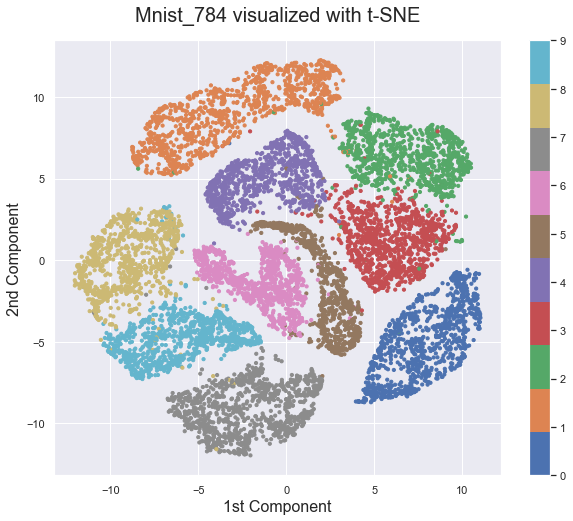

In [19]:
def plot_tsne_2d(x, y, title, xlabel="1st Component", ylabel="2nd Component"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=data['y'][:10000],
        cmap=CMAP,
        s=10)
    
    plt.title(title, fontsize=20, y=1.03)
    plt.colorbar()
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    title = 'Mnist_784 visualized with t-SNE')